In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./data/runtime_data.csv')
data

,Implementation,128,256,512,1024,2048
0,CPU (C),0.001184,0.011997,0.116920,1.017375,33.646096
1,Naive CUDA,0.000248,0.000288,0.000799,0.004872,0.035949
2,Optimized CUDA,0.000226,0.000252,0.000609,0.003151,0.023797
3,cuBLAS,0.008388,0.020142,0.007548,0.008165,0.012450


In [3]:
data.set_index('Implementation', inplace=True)
speedup_df = pd.DataFrame({
    "Naive CUDA Speedup": data.loc['CPU (C)'] / data.loc['Naive CUDA'],
    "Optimized CUDA Speedup": data.loc['CPU (C)'] / data.loc['Optimized CUDA'],
    "cuBLAS Speedup": data.loc['CPU (C)'] / data.loc['cuBLAS']
}).T
data.reset_index(inplace=True)
speedup_df.index.name = 'Implementation'
speedup_df.reset_index(inplace=True)
speedup_df

,Implementation,128,256,512,1024,2048
0,Naive CUDA Speedup,4.774194,41.656250,146.332916,208.820813,935.939692
1,Optimized CUDA Speedup,5.238938,47.607143,191.986864,322.873691,1413.879733
2,cuBLAS Speedup,0.141154,0.595621,15.490196,124.601960,2702.497671


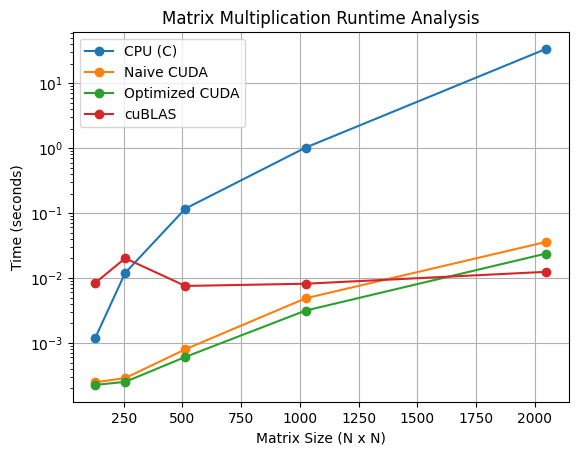

In [4]:
cpu_data = data[data['Implementation'] == 'CPU (C)']
cpu_Ns = np.array(cpu_data.columns[1:]).astype(np.float32)
cpu_times = cpu_data.values[0][1:]

naive_cuda_data = data[data['Implementation'] == 'Naive CUDA']
gpu_Ns = np.array(naive_cuda_data.columns[1:]).astype(np.float32)
gpu_times = naive_cuda_data.values[0][1:]

optimized_cuda_data = data[data['Implementation'] == 'Optimized CUDA']
opt_gpu_Ns = np.array(optimized_cuda_data.columns[1:]).astype(np.float32)
opt_gpu_times = optimized_cuda_data.values[0][1:]

cublas_data = data[data['Implementation'] == 'cuBLAS']
cublas_Ns = np.array(cublas_data.columns[1:]).astype(np.float32)
cublas_times = cublas_data.values[0][1:]

plt.plot(cpu_Ns, cpu_times, marker="o", label="CPU (C)")
plt.plot(gpu_Ns, gpu_times, marker="o", label="Naive CUDA")
plt.plot(opt_gpu_Ns, opt_gpu_times, marker="o", label="Optimized CUDA")
plt.plot(cublas_Ns, cublas_times, marker="o", label="cuBLAS")
plt.xlabel('Matrix Size (N x N)')
plt.ylabel('Time (seconds)')
plt.yscale('log')
plt.title('Matrix Multiplication Runtime Analysis')
plt.grid(True)
plt.legend()
plt.show()

In [5]:
data = pd.read_csv('./data/conv_runtime_data.csv')
data

,Implementation,Image,Kernel,512,1024,2048
0,CPU (C),boat.png,edge,0.001659,0.006624,0.027701
1,CPU (C),boat.png,sharpen,0.003693,0.015645,0.062543
2,CPU (C),boat.png,sharpen7,0.007372,0.029985,0.117969
3,CPU (C),bumblebee.png,edge,0.001583,0.006927,0.026055
4,CPU (C),bumblebee.png,sharpen,0.003869,0.014936,0.061752
5,CPU (C),bumblebee.png,sharpen7,0.007600,0.029169,0.115896
6,CPU (C),hut.png,edge,0.001564,0.006228,0.026172
7,CPU (C),hut.png,sharpen,0.003728,0.015276,0.061458
8,CPU (C),hut.png,sharpen7,0.007234,0.029267,0.116287
9,GPU (CUDA),boat.png,edge,0.019859,0.000330,0.000599


In [10]:
avg_runtimes = data.groupby(['Implementation', 'Kernel'])[['512', '1024', '2048']].mean()
avg_runtimes

512      1024      2048
Implementation    Kernel                                
CPU (C)           edge      0.001602  0.006593  0.026643
                  sharpen   0.003763  0.015286  0.061918
                  sharpen7  0.007402  0.029474  0.116717
GPU (CUDA)        edge      0.006797  0.000311  0.000586
                  sharpen   0.000064  0.000175  0.000626
                  sharpen7  0.000100  0.000297  0.001109
GPU (python CUDA) edge      0.120681  0.003596  0.013346
                  sharpen   0.001637  0.003278  0.009925
                  sharpen7  0.001167  0.002946  0.009786

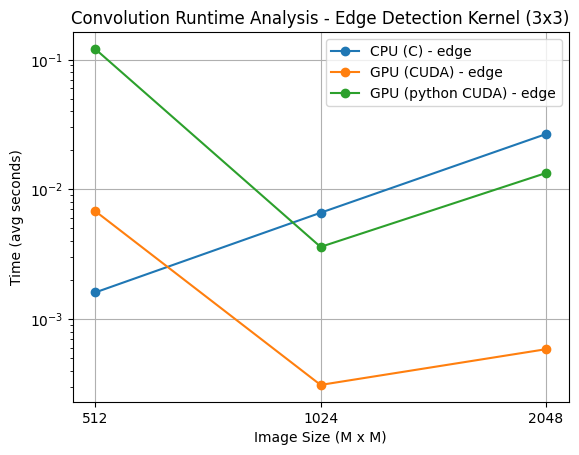

In [21]:
cpu_edge_data = avg_runtimes.loc['CPU (C)'].loc['edge']
cpu_edge_Ns = np.array(cpu_edge_data.index)
cpu_edge_times = cpu_edge_data.values

cuda_edge_data = avg_runtimes.loc['GPU (CUDA)'].loc['edge']
cuda_edge_Ns = np.array(cuda_edge_data.index)
cuda_edge_times = cuda_edge_data.values

python_cuda_edge_data = avg_runtimes.loc['GPU (python CUDA)'].loc['edge']
python_cuda_edge_Ns = np.array(python_cuda_edge_data.index)
python_cuda_edge_times = python_cuda_edge_data.values

plt.plot(cpu_edge_Ns, cpu_edge_times, marker="o", label="CPU (C) - edge")
plt.plot(cuda_edge_Ns, cuda_edge_times, marker="o", label="GPU (CUDA) - edge")
plt.plot(python_cuda_edge_Ns, python_cuda_edge_times, marker="o", label="GPU (python CUDA) - edge")
plt.xlabel('Image Size (M x M)')
plt.ylabel('Time (avg seconds)')
plt.yscale('log')
plt.title('Convolution Runtime Analysis - Edge Detection Kernel (3x3)')
plt.grid(True)
plt.legend()
plt.show()

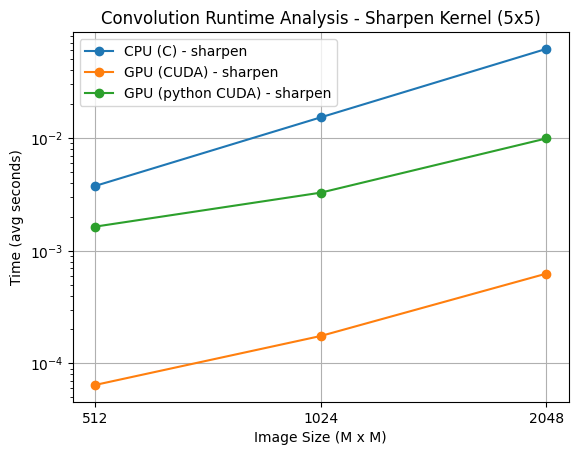

In [22]:
cpu_edge_data = avg_runtimes.loc['CPU (C)'].loc['sharpen']
cpu_edge_Ns = np.array(cpu_edge_data.index)
cpu_edge_times = cpu_edge_data.values

cuda_edge_data = avg_runtimes.loc['GPU (CUDA)'].loc['sharpen']
cuda_edge_Ns = np.array(cuda_edge_data.index)
cuda_edge_times = cuda_edge_data.values

python_cuda_edge_data = avg_runtimes.loc['GPU (python CUDA)'].loc['sharpen']
python_cuda_edge_Ns = np.array(python_cuda_edge_data.index)
python_cuda_edge_times = python_cuda_edge_data.values

plt.plot(cpu_edge_Ns, cpu_edge_times, marker="o", label="CPU (C) - sharpen")
plt.plot(cuda_edge_Ns, cuda_edge_times, marker="o", label="GPU (CUDA) - sharpen")
plt.plot(python_cuda_edge_Ns, python_cuda_edge_times, marker="o", label="GPU (python CUDA) - sharpen")
plt.xlabel('Image Size (M x M)')
plt.ylabel('Time (avg seconds)')
plt.yscale('log')
plt.title('Convolution Runtime Analysis - Sharpen Kernel (5x5)')
plt.grid(True)
plt.legend()
plt.show()

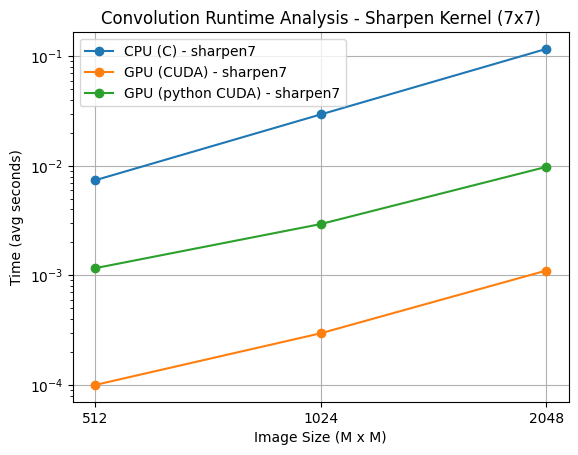

In [23]:
cpu_edge_data = avg_runtimes.loc['CPU (C)'].loc['sharpen7']
cpu_edge_Ns = np.array(cpu_edge_data.index)
cpu_edge_times = cpu_edge_data.values

cuda_edge_data = avg_runtimes.loc['GPU (CUDA)'].loc['sharpen7']
cuda_edge_Ns = np.array(cuda_edge_data.index)
cuda_edge_times = cuda_edge_data.values

python_cuda_edge_data = avg_runtimes.loc['GPU (python CUDA)'].loc['sharpen7']
python_cuda_edge_Ns = np.array(python_cuda_edge_data.index)
python_cuda_edge_times = python_cuda_edge_data.values

plt.plot(cpu_edge_Ns, cpu_edge_times, marker="o", label="CPU (C) - sharpen7")
plt.plot(cuda_edge_Ns, cuda_edge_times, marker="o", label="GPU (CUDA) - sharpen7")
plt.plot(python_cuda_edge_Ns, python_cuda_edge_times, marker="o", label="GPU (python CUDA) - sharpen7")
plt.xlabel('Image Size (M x M)')
plt.ylabel('Time (avg seconds)')
plt.yscale('log')
plt.title('Convolution Runtime Analysis - Sharpen Kernel (7x7)')
plt.grid(True)
plt.legend()
plt.show()

In [11]:
cpu = avg_runtimes.loc['CPU (C)']
cuda = avg_runtimes.loc['GPU (CUDA)']
python_cuda = avg_runtimes.loc['GPU (python CUDA)']

cuda_speedup = cpu / cuda
python_cuda_speedup = cpu / python_cuda

speedup_cuda_df = cuda_speedup.reset_index().assign(Implementation='GPU (CUDA)')[['Implementation', 'Kernel', '512', '1024', '2048']]
speedup_python_cuda_df = python_cuda_speedup.reset_index().assign(Implementation='GPU (python CUDA)')[['Implementation', 'Kernel', '512', '1024', '2048']]

speedup_df = pd.concat([speedup_cuda_df, speedup_python_cuda_df], ignore_index=True)
speedup_df

,Implementation,Kernel,512,1024,2048
0,GPU (CUDA),edge,0.235692,21.222103,45.491178
1,GPU (CUDA),sharpen,58.497409,87.346667,98.962706
2,GPU (CUDA),sharpen7,73.774086,99.237935,105.277210
3,GPU (python CUDA),edge,0.013275,1.833270,1.996369
4,GPU (python CUDA),sharpen,2.298835,4.662744,6.238476
5,GPU (python CUDA),sharpen7,6.344599,10.004439,11.927491
